# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score





## Load the Data

In [2]:
# Load the dataset
df = pd.read_csv("/Traffic_Accidents.csv")

##1: Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


## 1.1 Find the dataset information and observe the datatypes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

##1.2 : Check the shape of the data to understand its structure.

In [4]:
df.shape

(52000, 30)

##1.3 : View the the data with various functions to get an initial sense of the data.

In [5]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [6]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [7]:
df.sample(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
43985,3518,200501EO40972,530300.0,185390.0,-0.122021,51.552306,1,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002762,2005.0
41300,75427,2005160D03540,509260.0,428650.0,-0.344793,53.742781,16,3,2.0,1,...,-1.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0
16695,40737,200506C027245,380820.0,390620.0,-2.290021,53.412027,6,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01005266,2005.0
7240,72310,200514E046805,439120.0,384900.0,-1.413657,53.359524,14,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01008004,2005.0
40840,17025,200501SX20694,526870.0,193350.0,-0.168592,51.624623,1,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01000266,2005.0


## 1.4 Perform summary statistics on the dataset to grasp central tendencies and variability.

In [8]:
df.describe(include='all')


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,52000.000000,52000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,...,51999.000000,51993,51989,51999,51999,51999,51999.000000,51999,51959,51999.0
unique,NaN,38979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,6,5,9,6,NaN,2,14821,NaN
top,NaN,2.01E+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,Yes,E01000004,NaN
freq,NaN,13022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,51768,42824,37477,42490,36605,NaN,40976,138,NaN
mean,52309.605596,NaN,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,...,340.922479,NaN,NaN,NaN,NaN,NaN,1.249736,NaN,NaN,2005.0
std,30282.566278,NaN,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,...,1205.580339,NaN,NaN,NaN,NaN,NaN,0.432953,NaN,NaN,0.0
min,0.000000,NaN,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,...,-1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
25%,25924.750000,NaN,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
50%,52285.500000,NaN,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0
75%,78552.250000,NaN,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.0


## 1.5 Check for duplicated data.

In [9]:
df.duplicated().sum()


0

##1.6 Check for null values.

In [10]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                      

## 2. Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

## 2.1 Remove the outliers


In [11]:
columns_to_check = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']  # Example columns

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers based on the simplified IQR method
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [13]:
df.shape

(29028, 30)

##2.2 Impute missing data


In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

 #(mode)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)


Missing values after imputation:
Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                      

## 2.3 : Scale the data


In [37]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])
print("First 5 rows after scaling:")
df_scaled.head()


First 5 rows after scaling:


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
5,0.797586,200514B165305,-0.236205,0.745422,-0.213739,0.746952,0.476432,0.366631,-1.249062,0.0,...,-0.282840,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,-0.287910,No,E01007445,0.0
6,1.827090,20053102C3908,0.099989,0.192292,0.122954,0.194749,2.289793,-2.469121,-1.249062,0.0,...,-0.282840,None within 50 metres,Zebra crossing,Daylight: Street light present,Unknown,Normal,-0.287910,No,E01013813,0.0
8,-0.438304,200504EB05059,-1.114053,0.899513,-1.124884,0.900597,-0.590251,0.366631,-1.249062,0.0,...,-0.282840,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,3.469933,Yes,E01025080,0.0
9,-0.619407,2.01E+12,-1.583573,2.009055,-1.639390,2.001758,-0.696919,0.366631,-1.249062,0.0,...,-0.282840,None within 50 metres,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,-0.287910,Yes,E01019204,0.0
11,1.210488,200520J046401,-0.805215,-0.220302,-0.801197,-0.213056,1.116442,0.366631,0.518489,0.0,...,3.217141,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,-0.287910,Yes,E01009756,0.0


##2.4 : Reduce dimentions using PCA


In [22]:
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(df_scaled[numeric_columns])
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])




In [36]:
print("First 5 rows after PCA:")
df_pca.head()


First 5 rows after PCA:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.496081,0.550679,-1.666934,0.724644,0.008830,-0.778304,1.054261,-0.741850,-0.142589,-0.066548
1,2.265124,2.762245,-1.267614,1.057055,-2.055087,0.766629,-0.993408,1.007289,-0.115742,0.050759
2,1.454630,-1.606752,-1.900681,1.387352,2.268007,-2.285732,-0.298213,1.005195,-0.972480,0.761880
3,2.116650,-2.739300,-2.262234,0.657259,0.136897,-0.811682,1.045531,-0.867911,0.061345,-0.173977
4,2.043840,1.173437,0.623918,-0.693402,-0.675001,-0.341229,2.599417,1.883134,0.795004,0.638185


In [24]:
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

Explained variance ratio by each principal component:
[0.3198342  0.1131918  0.09376157 0.0801202  0.06809727 0.06645814
 0.06244749 0.06009183 0.0528812  0.03896179]


## 2.5 Implement One-Hot Encoding for nominal categorical variables.

In [35]:

categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#  One-Hot Encoding
print("First 5 rows after One-Hot Encoding:")
df_encoded.head()


First 5 rows after One-Hot Encoding:


,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,LSOA_of_Accident_Location_E01032470,LSOA_of_Accident_Location_E01032474,LSOA_of_Accident_Location_E01032475,LSOA_of_Accident_Location_E01032476,LSOA_of_Accident_Location_E01032477,LSOA_of_Accident_Location_E01032478,LSOA_of_Accident_Location_E01032479,LSOA_of_Accident_Location_E01032481,LSOA_of_Accident_Location_E01032482,LSOA_of_Accident_Location_W01000328
5,70490,433640.0,406080.0,-1.493735,53.550272,14,3,1.0,1,5.0,...,False,False,False,False,False,False,False,False,False,False
6,101926,456990.0,340390.0,-1.153083,52.957841,31,2,1.0,1,5.0,...,False,False,False,False,False,False,False,False,False,False
8,32752,372670.0,424380.0,-2.415593,53.715110,4,3,1.0,1,6.0,...,False,False,False,False,False,False,False,False,False,False
9,27222,340060.0,556150.0,-2.936149,54.896491,3,3,1.0,1,5.0,...,False,False,False,False,False,False,False,False,False,False
11,83098,394120.0,291390.0,-2.088100,52.520328,20,3,2.0,1,5.0,...,False,False,False,False,False,False,False,False,False,False


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [34]:
selected_features = [
    'Longitude', 'Latitude',
    'Accident_Severity',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Speed_limit'
]

# One-Hot Encoding
encoded_features = [col for col in df_encoded.columns if col.startswith('Road_Type') or col.startswith('Weather_Conditions')]

# Combine selected features and encoded features
final_features = selected_features + encoded_features
df_final = df_encoded[final_features]

#display
print("First 5 rows of the final dataset for clustering:")
df_final.head()


First 5 rows of the final dataset for clustering:


,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
5,-1.493735,53.550272,3,1.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False
6,-1.153083,52.957841,2,1.0,1,30.0,False,False,True,False,False,False,False,False,False,False,False,False,True
8,-2.415593,53.715110,3,1.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False
9,-2.936149,54.896491,3,1.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False
11,-2.088100,52.520328,3,2.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

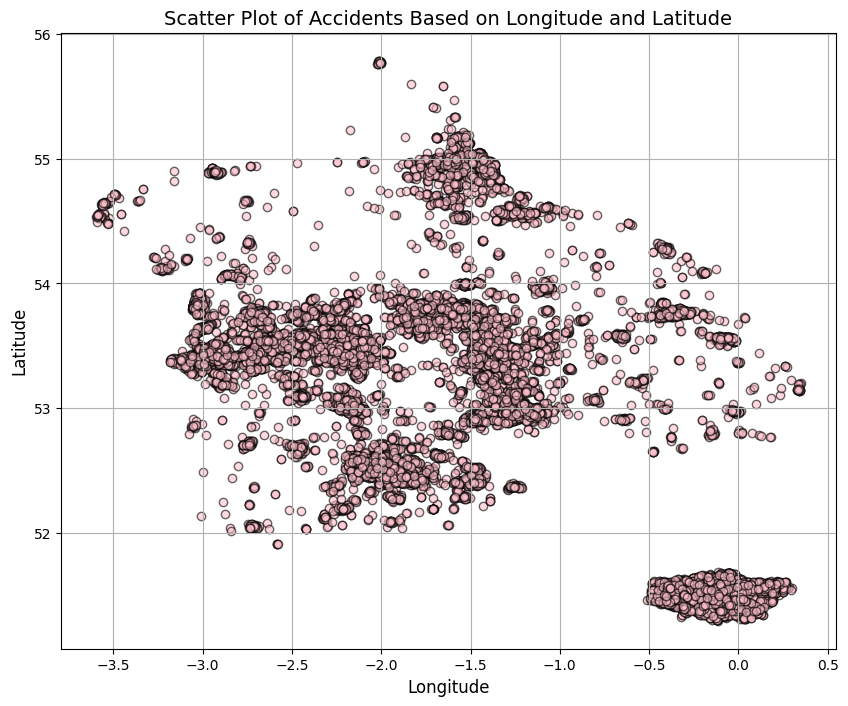

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], color='pink', alpha=0.6, edgecolor='k')
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()


## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

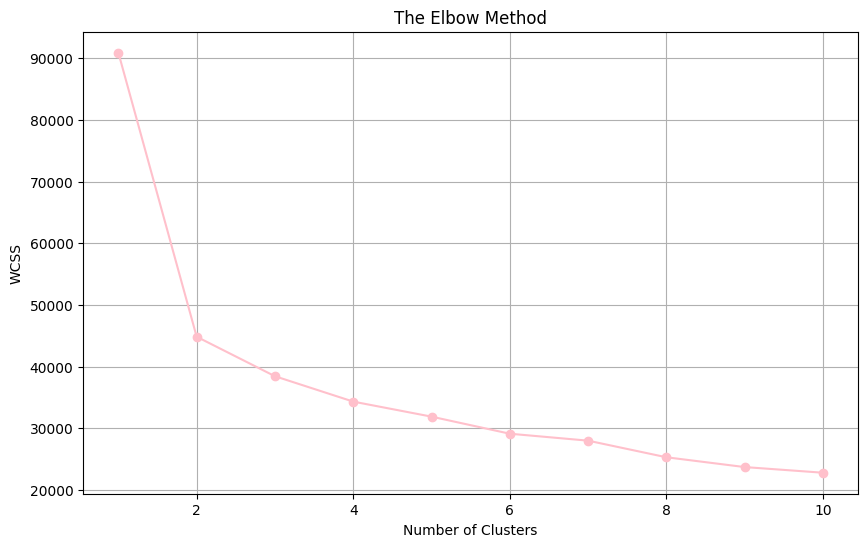

In [31]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
#plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='pink')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [43]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(df_final)
df_final.head()


,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Cluster
5,-1.493735,53.550272,3,1.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False,2
6,-1.153083,52.957841,2,1.0,1,30.0,False,False,True,False,False,False,False,False,False,False,False,False,True,3
8,-2.415593,53.715110,3,1.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False,0
9,-2.936149,54.896491,3,1.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False,0
11,-2.088100,52.520328,3,2.0,1,30.0,False,False,True,False,False,True,False,False,False,False,False,False,False,3


In [44]:
#  Silhouette Score
silhouette_avg = silhouette_score(df_final.drop('Cluster', axis=1), df_final['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

#  Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(df_final.drop('Cluster', axis=1), df_final['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.4f}')

#  Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(df_final.drop('Cluster', axis=1), df_final['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.4f}')


Silhouette Score: 0.3111
Davies-Bouldin Index: 1.5316
Calinski-Harabasz Index: 15958.7599


## Plot the data points with their predicted cluster center

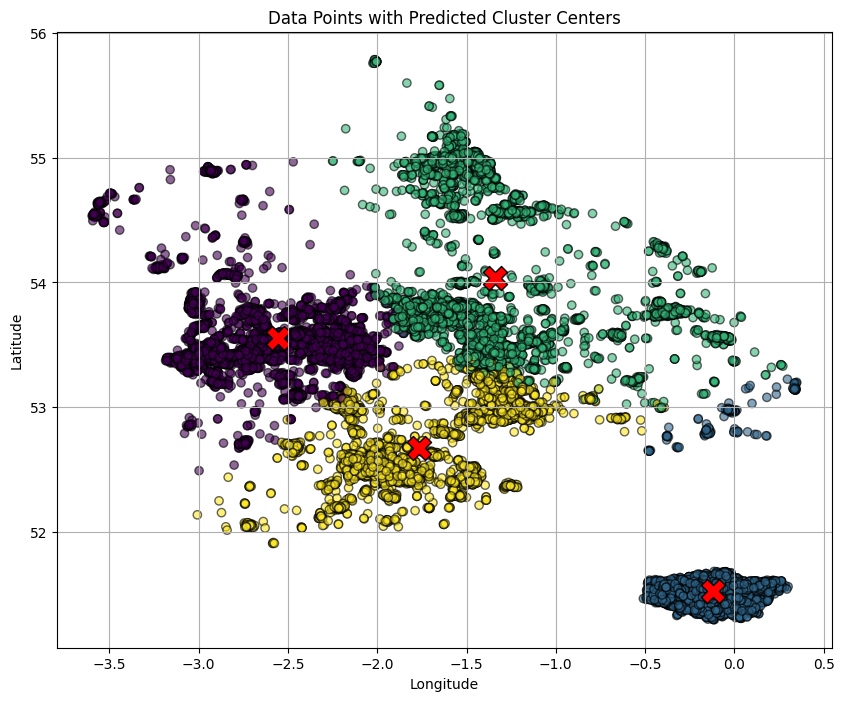

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(df_final['Longitude'], df_final['Latitude'], c=df_final['Cluster'], cmap='viridis', marker='o', alpha=0.6, edgecolor='k')

# plot / KMeans
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, marker='X', edgecolors='k')
plt.title('Data Points with Predicted Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



#### **1. Justify Your Feature Selection:**
**Which features did you choose for clustering and why?**

- **Selected Features**:
  - `Longitude`, `Latitude`: Reflect geographical location, crucial for clustering based on location.
  - `Accident_Severity`, `Number_of_Vehicles`, `Number_of_Casualties`, `Speed_limit`: Important indicators of accident characteristics and severity.
  - **One-Hot Encoded Features** (`Road_Type`, `Weather_Conditions`): Provide additional context about road and weather conditions.

#### **2. Number of Clusters Choices:**
**How did you determine the optimal number?**

- **Elbow Method**: Used to plot WCSS against the number of clusters. The optimal number is where the decrease in WCSS becomes minimal, indicating the best number of clusters.

#### **3. Evaluation:**
**Which metrics did you use to evaluate the clustering results, and why?**

- **Silhouette Score**: Measures cluster separation; higher values indicate better clustering.
- **Davies-Bouldin Index**: Lower values indicate less similarity between clusters.
- **Calinski-Harabasz Index**: Higher values suggest a better variance ratio between and within clusters.

#### **4. Improvements and Recommendations:**
**Suggest any improvements or future work that could be done with this dataset.**

- **Try Other Algorithms**: Consider DBSCAN or Agglomerative Clustering for handling complex or noisy data.
- **Enhance Feature Engineering**: Explore feature interactions for better clustering.
- **Use Advanced Techniques**: Apply t-SNE or UMAP for non-linear dimensionality reduction to discover hidden patterns.
